In [1]:
# PCA(Principal Component Analysis) VISUALIZATION:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# The below is the scatter plot in 2D.

(-2.3442920843811774,
 2.5013838122658663,
 -0.811266596024746,
 0.8394881901049549)

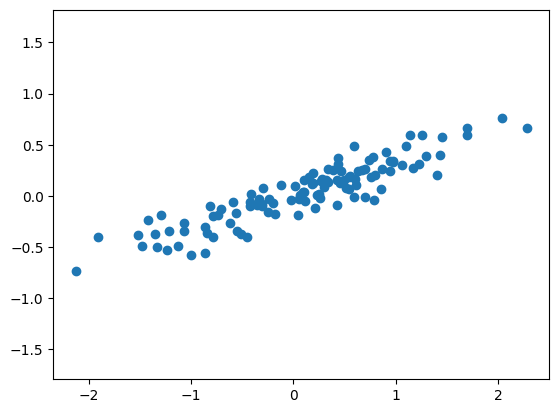

In [24]:
#rng = np.random.randn(2,110); rng

rng = np.random.RandomState(1) # Using the seed value = 1 for generating constant random values.
X = np.dot(rng.rand(2,2),rng.randn(2,110)).T;

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

# Apply PCA( Principal Component Analysis ) to reduce the dimensionality from 2 to 1.

In [25]:
pca = PCA()
pca.fit(X)

PCA()

In [27]:
print(pca.components_) # Eigen vector of the Covariance matrix
print(pca.explained_variance_) # Eigen values

[[-0.95062356 -0.31034634]
 [ 0.31034634 -0.95062356]]
[0.82198594 0.01428922]


# In the above result, [-0.95062356 -0.31034634] is the Principal Eigen vector corresponding to the larger Eigen value, 0.82198594.

# Now for dimensionality reduction, using this Principal Eigen vector, I will try to project all the points onto it, in the direction of the Pricipal Eigen vector. 

In [35]:
# Dimenion Reduction:

pca = PCA(n_components = 1)
pca.fit(X)

X_pca = pca.transform(X); X_pca

print("Original Shape :", X.shape)
print("Transformed Shape :", X_pca.shape)

Original Shape : (110, 2)
Transformed Shape : (110, 1)


(-2.358764470264494,
 2.5020729734984055,
 -0.811266596024746,
 0.8394881901049549)

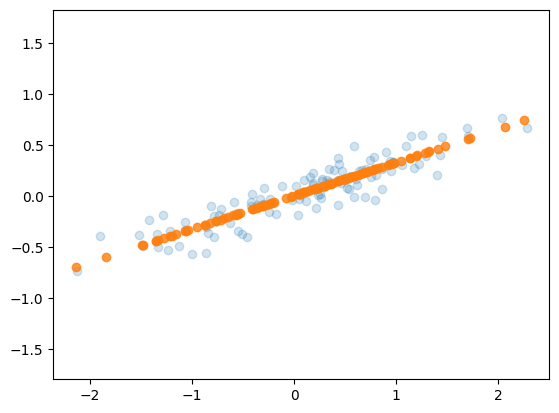

In [40]:
X_new = pca.inverse_transform(X_pca); X_new
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

# Principal Eigen Vectors are comming from the Covariance Matrix. Lets validate that.

In [44]:
# Validation.
C = np.cov(X.T)
print(C)

eigval, eigvec = np.linalg.eig(C)

print(eigvec)
print(eigval)



[[0.74419275 0.23828874]
 [0.23828874 0.09208241]]
[[ 0.95062356 -0.31034634]
 [ 0.31034634  0.95062356]]
[0.82198594 0.01428922]
